In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftshift, ifftshift
from wavefunction import wavefunction, sweep

%matplotlib inline

We initialize a spatial sinc wavefunction and plot its representation in position and momentum.

The momentum space representation shows Gibbs phenomena like artifacts due to a finite truncation imposed on the sinc in real space.

UNCERTAINTY BOUND BASED ON CAUCHY-SCHWARZ:
15.820397231927062
EMPIRICAL UNCERTAINTY PRODUCT:
75.48120993921536


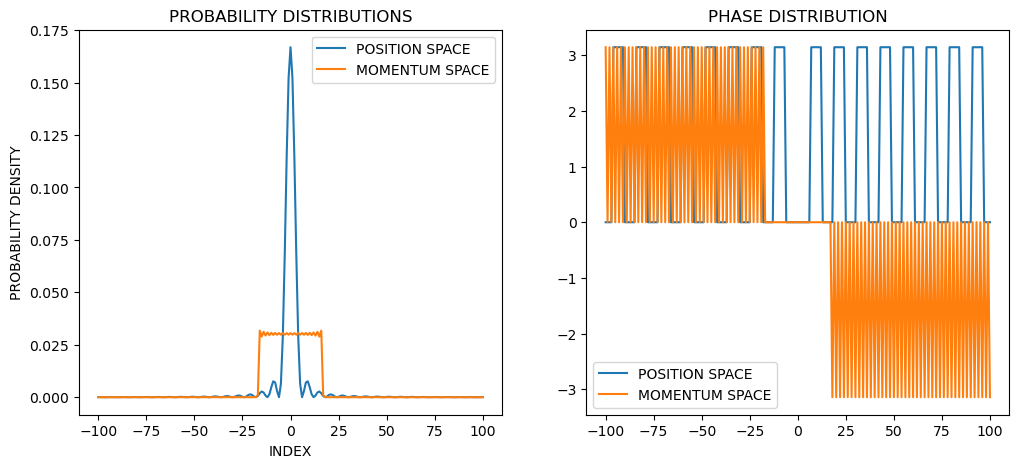

In [2]:
psiParams = {}
psiParams['N'] = 201
psiParams['initMethod'] = 'sinc'
psiParams['alpha'] = 1

funcParams_ = {}
funcParams_['center'] = 0
funcParams_['a'] = 0.03

funcParams_['initMethod'] = psiParams['initMethod']

psi = wavefunction(initParams=psiParams, funcParams=funcParams_)
psi.displ()

print('UNCERTAINTY BOUND BASED ON CAUCHY-SCHWARZ:')
print(psi.returnUncertaintyBound())

print('EMPIRICAL UNCERTAINTY PRODUCT:')
print(psi.returnUncertaintyProduct()[0])

Now, we define a spatial sinc that is broader in position space, leading to a narrower representation in momentum.

This behavior is expected. We point out that the uncertainty bound is still satisfied.

UNCERTAINTY BOUND BASED ON CAUCHY-SCHWARZ:
15.993716041160026
EMPIRICAL UNCERTAINTY PRODUCT:
40.840575341120754


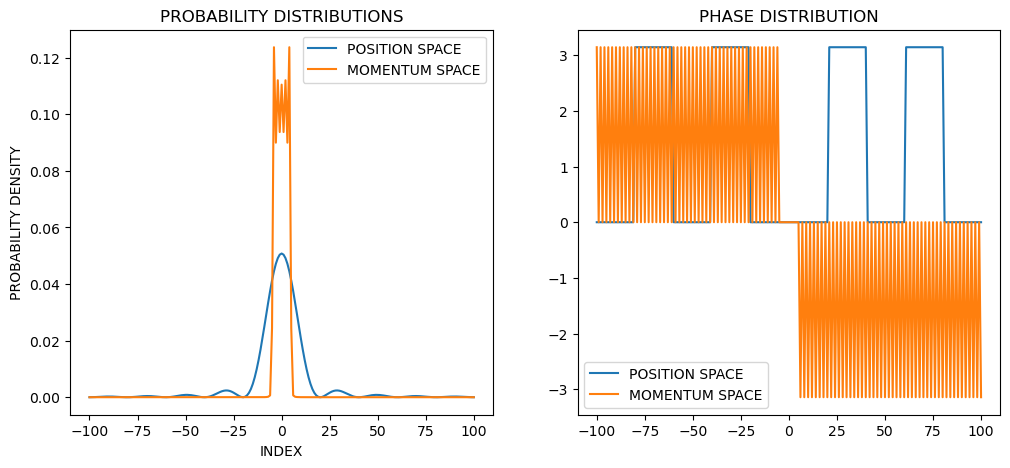

In [3]:
funcParams_ = {}
funcParams_['center'] = 0
funcParams_['a'] = 0.1

funcParams_['initMethod'] = psiParams['initMethod']

psi = wavefunction(initParams=psiParams, funcParams=funcParams_)
psi.displ()

print('UNCERTAINTY BOUND BASED ON CAUCHY-SCHWARZ:')
print(psi.returnUncertaintyBound())

print('EMPIRICAL UNCERTAINTY PRODUCT:')
print(psi.returnUncertaintyProduct()[0])

Now we display the matrix representations of the anticommutator and commutators of the Hermitian momentum (P) and position (X) operators. 

The representation is in the position basis |x>

{X, P} = XP + PX

[X, P] = XP - PX

The matrix elements of these can be obtained analytically. 

The text associated with this has the full description.

ANTICOMMUTATOR OPERATOR:


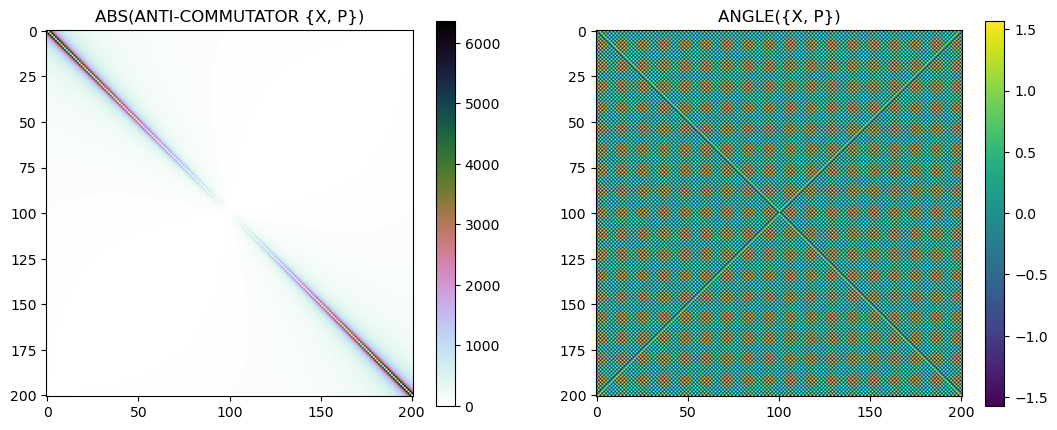

In [4]:
print('ANTICOMMUTATOR OPERATOR:')

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(13, 5))

h1 = axs[0].imshow(np.abs(psi.Anticommutator), cmap='cubehelix_r')
h2 = axs[1].imshow(np.angle(psi.Anticommutator))

axs[0].set_title('ABS(ANTI-COMMUTATOR {X, P})')
axs[1].set_title('ANGLE({X, P})')

fig.colorbar(h1)
fig.colorbar(h2)

COMMUTATOR OPERATOR:


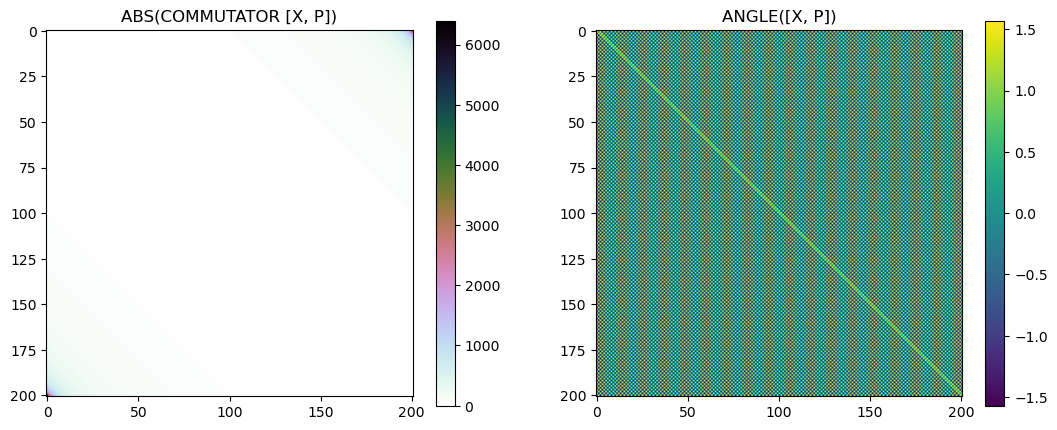

In [5]:
print('COMMUTATOR OPERATOR:')

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(13, 5))

h1 = axs[0].imshow(np.abs(psi.Commutator), cmap='cubehelix_r')
h2 = axs[1].imshow(np.angle(psi.Commutator))

axs[0].set_title('ABS(COMMUTATOR [X, P])')
axs[1].set_title('ANGLE([X, P])')

fig.colorbar(h1)
fig.colorbar(h2)

Next we initialize a Gaussian spatial wavefunction, sweeping over a sigma parameter (representing its spatial standard deviation).

We point out that the theoretical uncertainty bound and empirical uncertainty product nearly overlap, suggesting that the gaussian is close to a minimum uncertainty state.

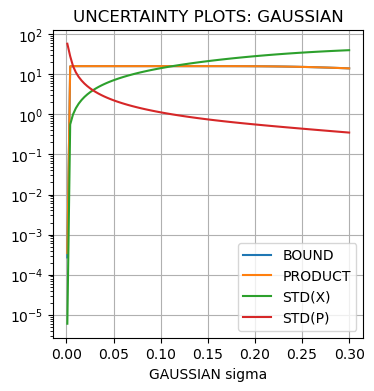

In [6]:
plotParams_ = {}

plotParams_['qty'] = 'sigma'
plotParams_['function'] = 'GAUSSIAN'

#sweep a gaussian
psiParams_ = {}
psiParams_['N'] = 201
psiParams_['initMethod'] = 'gaussian'
psiParams_['alpha'] = 1

funcParams_ = {}
funcParams_['center'] = 0
funcParams_[plotParams_['qty']] = 0.002
funcParams_['initMethod'] = psiParams_['initMethod']

sweep(psiParams_, funcParams_, plotParams_)

Next we initialize a Lorentzian spatial wavefunction, sweeping over a gamma parameter (representing its spread).

We point out that the theoretical uncertainty bound and empirical uncertainty product are quite different. 

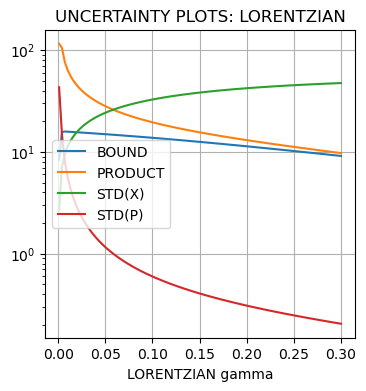

In [7]:
plotParams_ = {}

plotParams_['qty'] = 'gamma'
plotParams_['function'] = 'LORENTZIAN'

#sweep a gaussian
psiParams_ = {}
psiParams_['N'] = 201
psiParams_['initMethod'] = 'lorentzian'
psiParams_['alpha'] = 1

funcParams_ = {}
funcParams_['center'] = 0
funcParams_[plotParams_['qty']] = 0.002

funcParams_['initMethod'] = psiParams_['initMethod']

sweep(psiParams_, funcParams_, plotParams_)


A similar observation applies for the sinc family of functions, where the swept parameter is the location of the first root.

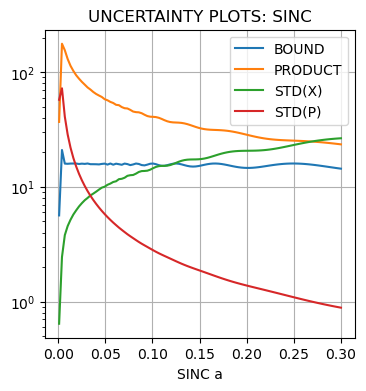

In [8]:
plotParams_ = {}

plotParams_['qty'] = 'a'
plotParams_['function'] = 'SINC'

#sweep a gaussian
psiParams_ = {}
psiParams_['N'] = 201
psiParams_['initMethod'] = 'sinc'
psiParams_['alpha'] = 1

funcParams_ = {}
funcParams_['center'] = 0
funcParams_[plotParams_['qty']] = 0.002

funcParams_['initMethod'] = psiParams_['initMethod']

sweep(psiParams_, funcParams_, plotParams_)

We observe a similar gap for a box family of functions, where the box width is swept.

The step like artifacts are due to finite sampling.

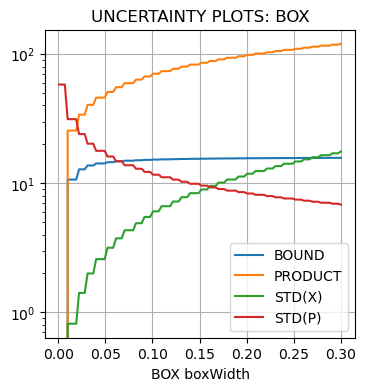

In [9]:
plotParams_ = {}

plotParams_['qty'] = 'boxWidth'
plotParams_['function'] = 'BOX'

#sweep a gaussian
psiParams_ = {}
psiParams_['N'] = 201
psiParams_['initMethod'] = 'box'
psiParams_['alpha'] = 1

funcParams_ = {}
funcParams_['center'] = 0
funcParams_[plotParams_['qty']] = 0.002

funcParams_['initMethod'] = psiParams_['initMethod']

sweep(psiParams_, funcParams_, plotParams_)

Next, we display an example Gaussian state and its momentum representation. 

These are expected to be nearly saturating the uncertainty bound.

In [10]:
#try to investigate the minimum uncertainty state

plotParams_ = {}

plotParams_['qty'] = 'sigma'
plotParams_['function'] = 'GAUSSIAN'

#sweep a gaussian
psiParams_ = {}
psiParams_['N'] = 201
psiParams_['initMethod'] = 'gaussian'
psiParams_['alpha'] = 1

funcParams_ = {}
funcParams_['center'] = 0
funcParams_[plotParams_['qty']] = 0.02

funcParams_['initMethod'] = psiParams_['initMethod']

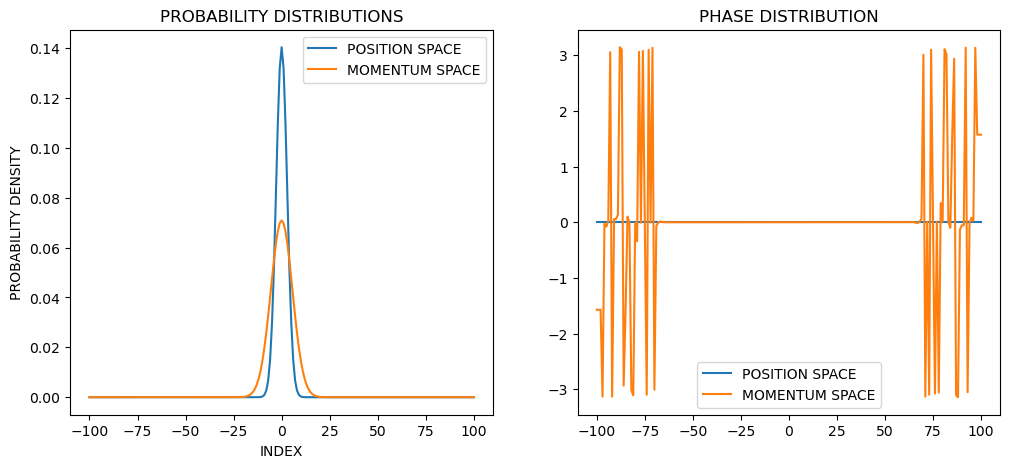

In [11]:
psi = wavefunction(initParams=psiParams_, funcParams=funcParams_)

psi.displ()

The Cauchy-Schwarts inequality should be saturated by states that satisfy a generalized eigenvalue problem in the position and momentum operators.

We try to obtain such states and study their representations.

These are related to coherent states, but not exactly the same thing. We leave the correspondence for future work.

In [12]:
from scipy.linalg import eig

In [13]:
w, v = eig(psi.Poperator, psi.Xoperator)

#this solves the generalized eigenvalue problem:
# psi.Poperator @ x = lamba * psi.Xoperator @ x
# These states should saturate the lower bound of the Cauchy-Schwartz

In [14]:
#obtain the uncertainty product and uncertainty bound
#for each of the eigenfunctions of the generalized eigenvalue problem

uncertaintyProduct = []
sigmaX = []
sigmaP = []
uncertaintyBound = []

Psi_p = np.zeros_like(v)

for iN in range(201):
    funcParams_u = {}

    funcParams_u['initMethod'] = 'plug'
    funcParams_u['psiX'] = v[:, iN]

    psi.update(funcParams_u)

    x, sigX, sigP = psi.returnUncertaintyProduct()
    bound = psi.returnUncertaintyBound()
    
    uncertaintyProduct.append(x)
    sigmaX.append(sigX)
    sigmaP.append(sigP)
    uncertaintyBound.append(bound)

    Psi_p[:, iN] = psi.P

sigmaX = np.array(sigmaX)
sigmaP = np.array(sigmaP)
uncertaintyBound = np.array(uncertaintyBound)
uncertaintyProduct = np.array(uncertaintyProduct)




In [15]:
kUnc = np.argsort(uncertaintyProduct)
kUnc = np.array(kUnc, dtype='int')

We plot the uncertainty bound and empirical uncertainty products of the solutions of this generalized eigenvalue problem.

We note that they overlap exactly, as expected.

Text(0.5, 0, 'STATE INDEX')

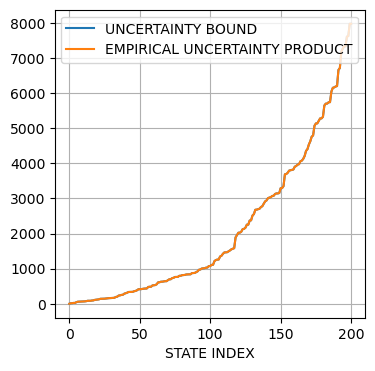

In [16]:
#display the uncertainty products for the calculated eigenfunctions

fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(4, 4))

#axs.plot(sigmaX[kUnc])
#axs.plot(sigmaP[kUnc])
axs.plot(uncertaintyBound[kUnc])
axs.plot(uncertaintyProduct[kUnc])

axs.grid(True)
axs.legend(['UNCERTAINTY BOUND', 'EMPIRICAL UNCERTAINTY PRODUCT'])
axs.set_xlabel('STATE INDEX')

We determine the 2D autocorrelation of individual states and take it's fourier transform with respect to the difference variable to obtain a phase-space representation that is somewhat analogous to a Wigner transform.

In [17]:
indexArr = psi.indexArr
N_ = len(indexArr)

W_arr = np.zeros((N_, N_, N_), dtype='complex64')

u = indexArr
y = indexArr 

plus = u[:, np.newaxis] + np.transpose( y[:, np.newaxis] )
plus = np.mod(plus - np.amin(u), len(u)) + np.amin(u)

minus = u[:, np.newaxis] - np.transpose( y[:, np.newaxis] )
minus = np.mod(minus - np.amin(u), len(u)) + np.amin(u)


for iN in range(N_):
    psiX = v[:, kUnc[iN]]
    #psiP = Psi_p[:, kUnc[iN]]
    phi1 = np.conjugate(psiX[minus])
    phi2 = psiX[plus]

    phi = phi1*phi2
    W_arr[..., iN] = fftshift(fft(phi, axis=-1))


Text(0.5, 1.0, 'WAVEFUNCTION')

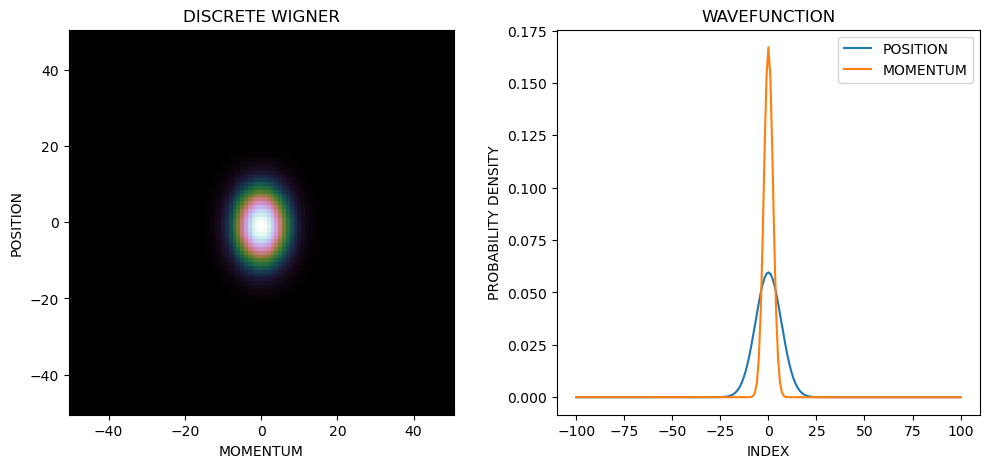

In [18]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

iN = 2

axs[0].pcolormesh(indexArr[50:-50], indexArr[50:-50], np.abs(W_arr[50:-50, 50:-50, iN]), cmap='cubehelix')
axs[0].set_aspect('equal')
axs[0].set_xlabel('MOMENTUM')
axs[0].set_ylabel('POSITION')
axs[0].set_title('DISCRETE WIGNER')

axs[1].plot(indexArr, np.abs(v[:, kUnc[iN]])**2)
axs[1].plot(indexArr, np.abs(Psi_p[:, kUnc[iN]])**2)
axs[1].set_xlabel('INDEX')
axs[1].set_ylabel('PROBABILITY DENSITY')
axs[1].legend(['POSITION', 'MOMENTUM'])
axs[1].set_title('WAVEFUNCTION')



In the above, we have chosen a state which has a broad position spread and narrow momentum spread. 

We have displayed the wigner transform of the density matrix of this pure state.

Let us choose a pure state that has narrow position spread and broad momentum, while still saturating its own uncertainty bound.

Note that the eigensolver produces many states that don't look Gaussian (unlike coherent states).

In our formulation, we have prescribed that the momentum and position are both zero centered in our index coordinates. The uncertainty bounds therefore don't feature the expectations of the operators. We may study the more general case in future work, along with the analogy to coherent states.

Text(0.5, 1.0, 'WAVEFUNCTION')

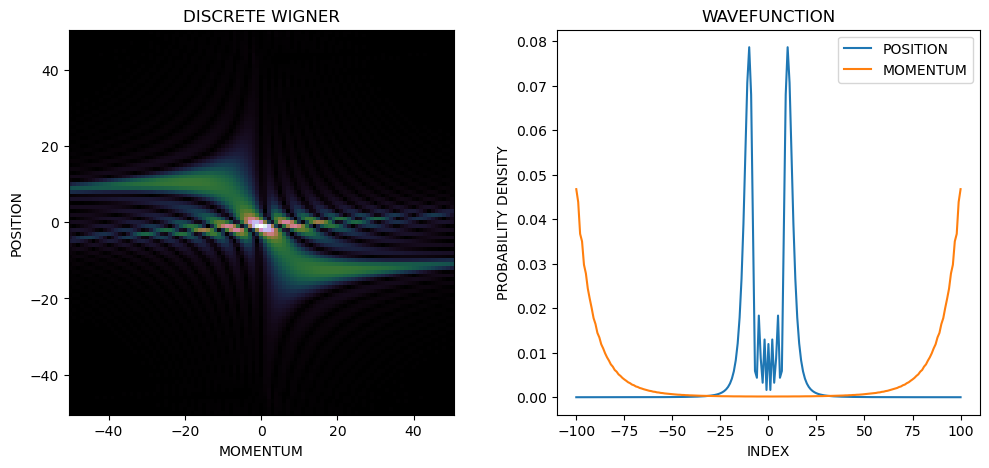

In [19]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

iN = 100

axs[0].pcolormesh(indexArr[50:-50], indexArr[50:-50], np.abs(W_arr[50:-50, 50:-50, iN]), cmap='cubehelix')
axs[0].set_aspect('equal')
axs[0].set_xlabel('MOMENTUM')
axs[0].set_ylabel('POSITION')
axs[0].set_title('DISCRETE WIGNER')

axs[1].plot(indexArr, np.abs(v[:, kUnc[iN]])**2)
axs[1].plot(indexArr, np.abs(Psi_p[:, kUnc[iN]])**2)
axs[1].set_xlabel('INDEX')
axs[1].set_ylabel('PROBABILITY DENSITY')
axs[1].legend(['POSITION', 'MOMENTUM'])
axs[1].set_title('WAVEFUNCTION')